# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats as smd
import pylab
%matplotlib inline
from scipy import stats
np.random.seed(42)


#df = pd.read_csv(r 'C:\Users\ozeiri\Downloads\human_body_temperature.csv')
df=pd.read_csv (r'C:\Users\ozeiri\Downloads\human_body_temperature.csv')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [39]:
temp=df.temperature

In [40]:
df.head()


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


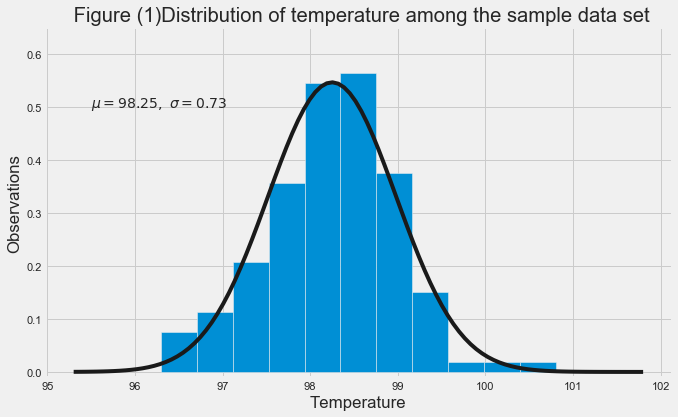

In [41]:
#Is the distribution of body temperatures normal? 
# To answer this question I will run three different plots to verifyy if teh data is normaly distributed or not 
# ploting a histogram 
sns.set(rc={"figure.figsize": (10, 6)})
plt.style.use('fivethirtyeight')
# setting the number of the bins to be square root the number of data points 
bins_n=int(np.sqrt(len(temp)))
_=plt.hist(df.temperature,density=True,bins=bins_n)

#Labels 
_ = plt.text(95.5, 0.5, r'$\mu= {},\ \sigma={}$'.format(round(np.mean(temp), 2), round(np.std(temp), 2)))
_=plt.xlabel('Temperature')
_=plt.ylabel('Observations')
_=plt.title(' Figure (1)Distribution of temperature among the sample data set')
margins=0.02
# over laying a PDF would give us a good visualization of the distribution of the data if it is normaly distibuted 
x=np.linspace(np.min(temp) - 1, np.max(temp) + 1, 100, endpoint=True)
pdf= [stats.norm.pdf( _ ,loc= np.mean(temp), scale=np.std(temp)) for _ in x]
plt.plot(x,pdf,'k-')
plt.ylim(-0.01, 0.65)
plt.show()




In [42]:
# calculating the sample statistics 
M=np.mean(df.temperature)
st=np.std(df.temperature)

Text(0.5,1,'Figure 2 Probability Plot of Human Body Temperatures')

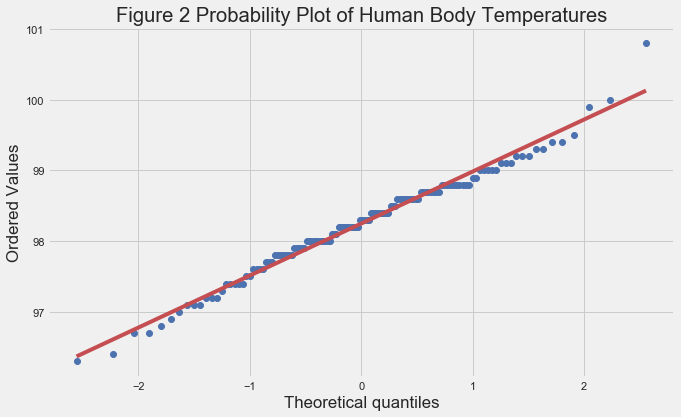

In [43]:
sns.set(rc={"figure.figsize": (10, 6)})
plt.style.use('fivethirtyeight')
stats.probplot(temp, dist='norm', plot=pylab)
plt.title('Figure 2 Probability Plot of Human Body Temperatures')

In [44]:
# creating a CDF
# computint scdf for one dimensional array of measurments 
def ecdf(data):
    #number of data point = n
    n=len(data)
    x= np.sort(data)
    y = np.arange(1,n+1)/n
    return x,y


In [45]:
temp=df.temperature

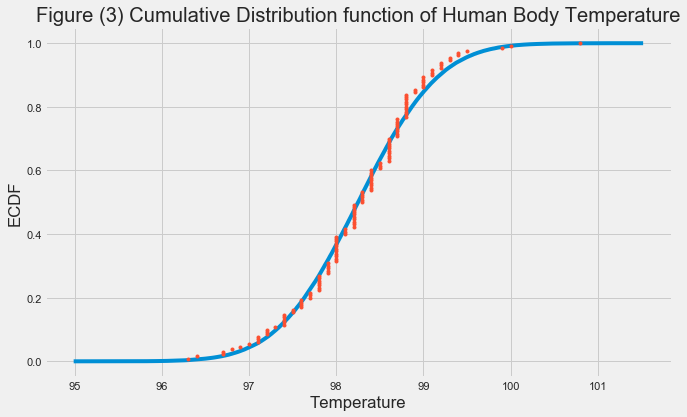

In [19]:
sns.set(rc={"figure.figsize": (10, 6)})
plt.style.use('fivethirtyeight')
# draw samples from a normal distribution of size = 100000
tempnormal=np.random.normal(np.mean(temp),np.std(temp),100000)
#Ploting the CDF 
nt_x,nt_y=ecdf(tempnormal)
x,y=ecdf(temp)
_=plt.plot(nt_x,nt_y)
_=plt.plot(x,y,marker='.',linestyle='none')
_=plt.xlabel('Temperature')
_=plt.ylabel('ECDF')
_=plt.title('Figure (3) Cumulative Distribution function of Human Body Temperature')
margins=0.02
_=plt.show()

To answe question 1 we can see from the different figures starting figure number one that the data is not quite normaly 
 distributed but it is symetrically sliced 
 Figure number two shows the data is kind of normaly distributed but with some outliers in both ends 
 The third figure the CDF plot shows the data is more likely normaly distributed compared to teh theoratical normal distribution 

# Question 2 Is the sample size large? Are the observations independent? 

In [20]:
# let us see the info of the data set we have
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


This data set is of 129 row of data. this sample resembels the population of human beings it is samll compared to the population   but the size still large enough (129) for Central Limit Theory to apply

# Question 3 is the true population mean really 98.6 degrees F?

In [21]:

# Trying to solve for the true population mean and make sure it is 98.6 we will assume that this mean temp is the null hypothesis
# H0 X_POP = 98.6
# H1 X_POP NOT EQUAL TO 98.6
df.describe()


,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [22]:


bs_replicates=np.empty(10000)
size = len(bs_replicates)

for i in range(size):
    bs_sample=np.random.choice(temp,len(temp))
    bs_replicates[i]=np.mean(bs_sample)
p=np.sum(bs_replicates>=98.6)/size

print('p-value'," ",p)
print('The mean: {:0.5}'.format(np.mean(bs_replicates)))
    


p-value   0.0
The mean: 98.25


 Although  a 100000 samples were draw the p value of zero indicates that the null hypothesis should be rejected.
The mean body temperature of teh 100000 is 98.25

Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?

__AnalysiS__
I will use one smaple test since the hypothesized population mean is know and we are trying to see if the difference between 
The sample mean and the population mean is statistically significant 
A One-Sample T-Test compares a sample mean to a known population mean


#In this situation, is it appropriate to use the t or z statistic?
# Analysis
the usage of z-statistic requires the standard deviation of the population to be known
the usage of the T statistic onthe other hand requires only the sample standard deviation 
 so we will use the T statistic 
A two-tailed test is required, since the alternative hypothesis is that there is a statistically-significant
difference between the sample mean and the hypothetical population mean , rather than testing whether 
the actual mean temperature is greater than or less than the hypothesized


In [23]:
t_stat = stats.ttest_1samp(temp, 98.6)
print('t-score: {}\np-value: {}'.format(round(t_stat.statistic, 5), round(t_stat.pvalue, 5)))


t-score: -5.45482
p-value: 0.0


 # Draw a small sample of size 10 from the data and repeat both frequentist tests. 
Which one is the correct one to use? 

In [24]:
# we will run a t test statistic since we don't know the standsrd devaition of the population 
bs_sample1=np.random.choice(temp,10)
t_test10=stats.ttest_1samp(bs_sample1,98.6)
print('t-score: {:0.4}\np-value: {:0.4}'.format(t_test10.statistic, t_test10.pvalue))
# Base on this t test and p value we can not reject the null hypothesis since the p value is greater than 0.05


t-score: -0.1829
p-value: 0.8589


# Question  5: At what temperature should we consider someone's temperature to be "abnormal"? 


# Analysis
 any temperature lies outside the 95% confidabce interval considered as abnormal temperature

In [25]:
# now we will calculate the 95% confidance interval using the bootstrap

bs_replicates2=np.empty(100000)
size=len(bs_replicates2)
for i in range(size):
    bs_sample2=np.random.choice(temp,len(temp))
    bs_replicates2[i]=np.mean(bs_sample2)
p=np.sum(bs_replicates2>=98.6)/size

ci=stats.norm.interval(0.95,loc=M,scale=st)
print('95% confidence interval: {:0.5} - {:0.5}'.format(ci[0], ci[1]))





95% confidence interval: 96.818 - 99.681


In [26]:
# constructing the 95% condfidence interval using the T-stat 
ci2 = stats.norm.interval(0.95,loc=M,scale=st)
print('95% confidence interval: {:0.5} - {:0.5}'.format(ci2[0], ci2[1]))




95% confidence interval: 96.818 - 99.681


# any body temperature lies out side this confidence interval[ 96.818 - 99.681] considedrd abnormal

# Question 6-Is there a significant difference between males and females in normal temperature? 
so in this question we are to verify in case there is a significant difference between males and females 
 so the null hypothesis is X_M = X_F(Mean of female body temperature equals to male body temperature)
 the relative hypothesis is X_M not equal X_F
It is best to use a permutation test since it exactly simulates the null hypothesis.
A two-sample t-test is also appropriate since the means of two independent samples are compared.
First, some graphical data analysis:


In [27]:
males = df[df.gender == 'M']
females = df[df.gender == 'F']

print('Of the {} participants, {} are female and {} are male.'.format(len(males + females), len(females), len(males)))

Of the 130 participants, 65 are female and 65 are male.


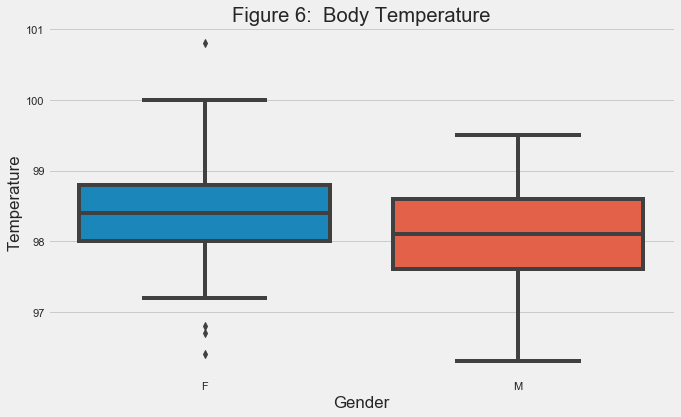

In [28]:
# now let ususe the boxplot to see the distribution  of the temperature of males and females using 25th 50th and 75 percentile 
#and the outliers
_=sns.boxplot(x='gender',y='temperature',data=df)
_=plt.xlabel('Gender')
_=plt.ylabel('Temperature')
_=plt.title('Figure 6:  Body Temperature')
plt.show()

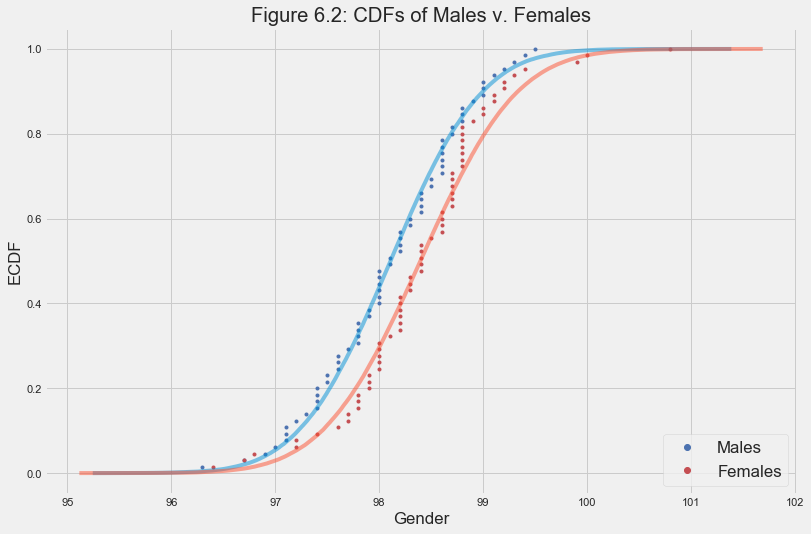

In [29]:
# let us now check for the normality of the two samples  males and females
sns.set(rc={"figure.figsize": (12, 8)})
plt.style.use('fivethirtyeight')
males_x,males_y=ecdf(males.temperature)
females_x,females_y=ecdf(females.temperature)
# drwaing 100000 random samples from normal dist
male_norm=np.random.normal(np.mean(males.temperature),np.std(males.temperature),100000)
nrm_x,nrm_y=ecdf(male_norm)
fem_norm=np.random.normal(np.mean(females.temperature),np.std(females.temperature),100000)
fnrm_x,fnrm_y=ecdf(fem_norm)
_=plt.plot(males_x,males_y,marker='.',linestyle='none',color='b')
_=plt.plot(females_x,females_y,marker='.',linestyle='none',color='r')
_=plt.plot(nrm_x,nrm_y,alpha=0.5)
_=plt.plot(fnrm_x,fnrm_y,alpha=0.5)

margins=0.2

# Label the axes
_ = plt.xlabel('Gender')
_ = plt.ylabel('ECDF')
_ = plt.title('Figure 6.2: CDFs of Males v. Females')
_ = plt.legend(('Males', 'Females'), loc='lower right', fontsize='large', markerscale=2)
plt.show()

In [30]:
# now let us check the variance of the two arrays fem_temp and m_temp
fem_temp=females.temperature
m_temp=males.temperature
female_v=np.var(fem_temp)
male_v=np.var(m_temp)
print('Male variance: {}\nFemale variance: {}'.format(male_v, female_v))

Male variance: 0.4807479289940825
Female variance: 0.5442698224852062


In [31]:
# the variances of the two arrays are not equal so we will apply bootstrap on the  variances  to confirm they are not equal

bs_m_replicates=np.empty(size)
size=10000

for i in range(size):
    samples_m=np.random.choice(m_temp,len(m_temp))
    bs_m_replicates[i]=np.var(samples_m)
bs_m_var=np.sum(bs_m_replicates)/size

bs_f_replicates=np.empty(size)
size=10000

for i in range (size):
    samples_f=np.random.choice(fem_temp,len(fem_temp))
    bs_f_replicates[i]=np.var(samples_f)
bs_f_var=np.sum(bs_f_replicates)/size

bs_m_var
bs_f_var

print(' bootstrap Male variance: {}\n bootstrap Female variance: {}'.format(bs_m_var,bs_f_var ))
# the bootstra variances of teh male and female are not equal so 


                

 bootstrap Male variance: 0.4739684009467454
 bootstrap Female variance: 0.5372722897041412


In [32]:
# lets now perform the t-test
r = stats.ttest_ind(m_temp, fem_temp, equal_var=False)
print('t-statistic: {:0.4}\np-value: {:0.4}'.format(r.statistic, r.pvalue))


t-statistic: -2.285
p-value: 0.02394


In [33]:
# now will cehck the means of both samples males and females

m_mean=np.mean(m_temp)
m_std=np.std(m_temp)
print ('The males sample statistics')
print('sample mean : {}\nsample standard deviation :{}\n'.format(round(m_mean,2),round(m_std,2)))
# confidence interval for one draw
ci_low_m, ci_high_m = stats.norm.interval(0.95, loc=m_mean, scale=m_std)
print('95% confidence interval (one draw): {} - {}'.format(round(ci_low_m, 2), round(ci_high_m, 2)))


The males sample statistics
sample mean : 98.1
sample standard deviation :0.69

95% confidence interval (one draw): 96.75 - 99.46


In [34]:
f_mean=np.mean(fem_temp)
f_std=np.std(fem_temp)
print ('The females sample statistics')
print('sample mean : {}\nsample standard deviation :{}\n'.format(round(f_mean,2),round(f_std,2)))
# confidence interval for one draw
ci_low_m, ci_high_m = stats.norm.interval(0.95, loc=f_mean, scale=f_std)
print('95% confidence interval (one draw): {} - {}'.format(round(ci_low_m, 2), round(ci_high_m, 2)))

The females sample statistics
sample mean : 98.39
sample standard deviation :0.74

95% confidence interval (one draw): 96.95 - 99.84


In [35]:
# Define permutation functions:

def permutation_sample(data1, data2):
    """Return a permutation sample from two data sets."""

    # Concatenate the data sets:
    data = np.concatenate((data1, data2))

    # Permute the concatenated array:
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two samples:
    permutation_sample_1 = permuted_data[:len(data1)]
    permutation_sample_2 = permuted_data[len(data1):]

    return permutation_sample_1, permutation_sample_2


def draw_permutation_replicates(data_1, data_2, func, size=1):
    """Draw multiple permutation replicates."""

    # Initialize array of permutation replicates:
    permutation_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation samples:
        permutation_sample_1, permutation_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic:
        permutation_replicates[i] = func(permutation_sample_1, permutation_sample_2)

    return permutation_replicates


def difference_of_means(data_1, data_2):
    """Return the difference in means of two arrays."""

    # The difference of means of data_1, data_2:
    return np.mean(data_1) - np.mean(data_2)

In [36]:
# Seed the random number generator:
np.random.seed(15)


# Compute difference of means:
empirical_difference = difference_of_means(fem_temp, m_temp)

# Draw 10,000 permutation replicates:
permutation_replicates = draw_permutation_replicates(fem_temp, m_temp, difference_of_means, size=10000)

# Compute fraction of replicates that are greater than the observed difference of means:
p = np.sum(permutation_replicates >= empirical_difference) / len(permutation_replicates)

# Print the results:
print('Difference of Means', empirical_difference)
print('p-value =', p)

Difference of Means 0.289230769230727
p-value = 0.013


# Analysis
 The box plot above in this unit describes the distributio of the temperature on Males and Females sampels and as we can see the
Femal body temperature is on average higher than the male body temperature of female sample mean : 98.39 vs male sample mean : 98.1
 The ECDF plot shows that both samples roughly follow the standard normal distribution, 
with the females' temperatures running a little warmer and with slightly more variation
then the T-testing of  -2.285 and a p-value of 0.02394 of teh variances rejects the null hypothesis stated before 
 as for the mean being another T-statistic the difference of the means between the two samples is different from zero
so to check the difference of the mean we applied the permutation function and after that did the replicets of the permutations 
 and it turned out of p-value 0.013 which imolies to reject the null hypothesis and states that the body temperature of female 
is different from the males and is slightly higher 
#the p value is less than 0.05 so the null hypothesis is rejected 